In [ ]:
pip install scikit-image

In [1]:
import keras
import skimage
from skimage import io
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def plot_image(images,title=None, cmap=None):
    f,axes = plt.subplots(1,len(images),sharey=True)
    f.set_figwidth(15)
    for ax,image in zip(axes,images):
        ax.imshow(image,cmap)
    f.suptitle(title)

## Image Augmentation and Preprocessing

In [3]:
## path to dataset
DATASET_PATH = "flowers2"
flowers_cls = ['daisy','rose']

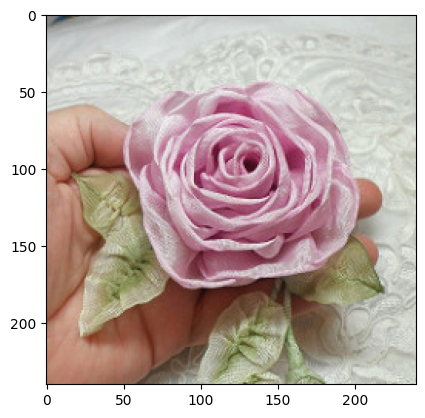

In [16]:
### getting an image from one of the two classes
flower_path = os.path.join(DATASET_PATH,flowers_cls[1],'*')
flower_path_list = glob.glob(flower_path)

## getting a random index
index = np.random.randint(0,len(flower_path_list))
image_path = flower_path_list[index] 
## Reading the image
image = io.imread(image_path)
plt.imshow(image)


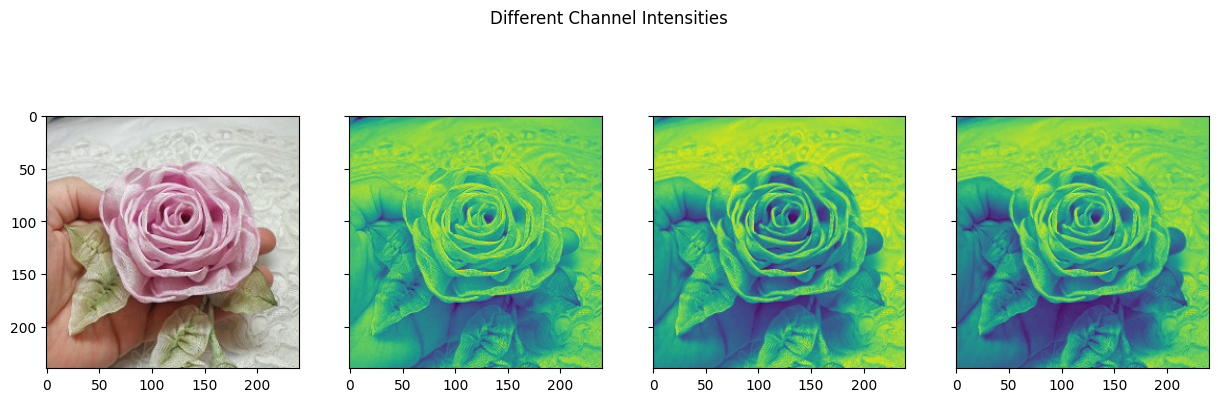

In [30]:
img_red = image[:,:,0]
img_green = image[:,:,1]
img_blue = image[:,:,2]
plot_image([image,img_red,img_green,img_blue],title="Different Channel Intensities")


### MORPHOLOGICAL TRANSFORMATIONS

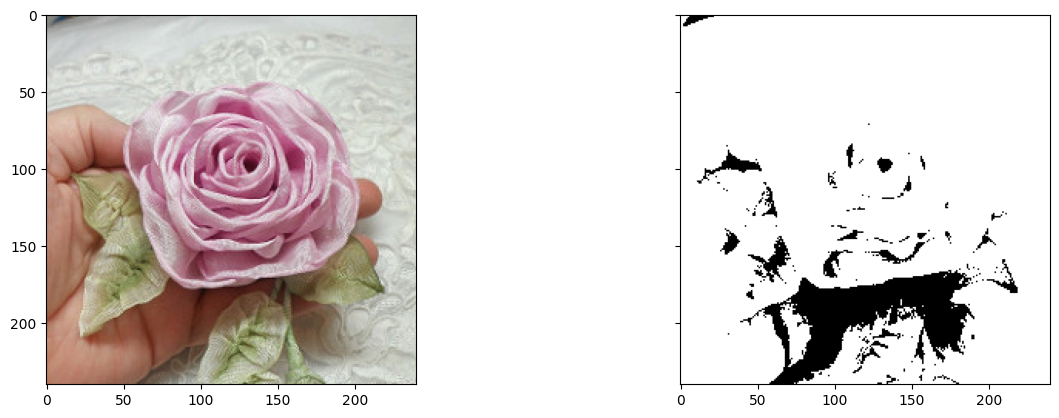

In [33]:
## Thresholding
bin_image = image[:,:,0]>125
plot_image([image,bin_image],cmap='gray')

#### Erosion, Dilation, Opening and Closing

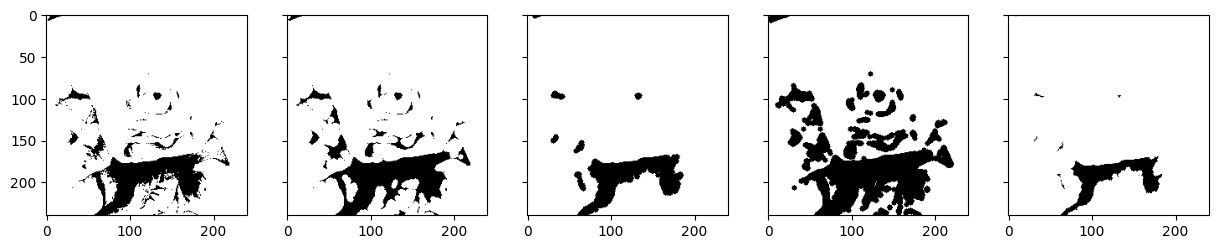

In [36]:
from skimage.morphology import binary_closing,binary_dilation,binary_erosion,binary_opening
from skimage.morphology import disk

## using a disk of radius 3
selem = disk(3)  ## structuring element

#opening and closing
open_img = binary_opening(bin_image,selem)
close_img = binary_closing(bin_image,selem)

#erosion and dilation
eroded_img = binary_erosion(bin_image,selem)
dilated_img = binary_dilation(bin_image,selem)

plot_image([bin_image,open_img,close_img,eroded_img,dilated_img],cmap='gray')

### NORMALIZATION

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


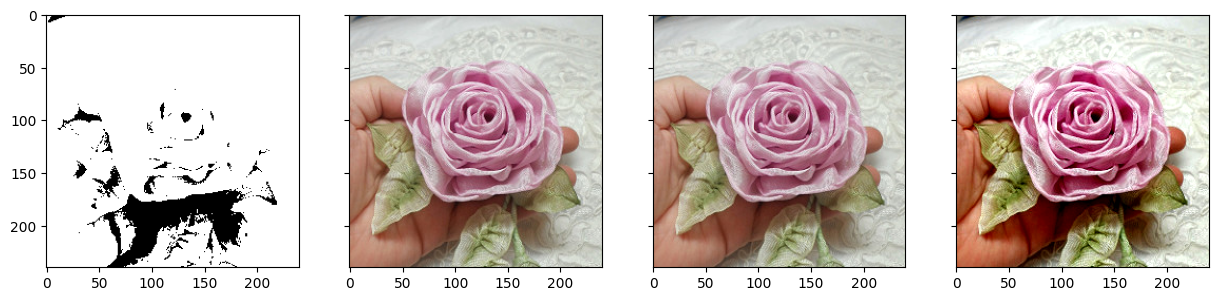

In [37]:
norm1_image = image/255  ## natural images
norm2_image = (image-np.min(image))/(np.max(image)-np.min(image))
norm3_image = (image-np.percentile(image,5))/(np.percentile(image,95) - np.percentile(image,5))   ## for outliers

plot_image([bin_image,norm1_image,norm2_image,norm3_image],cmap='gray')

### AUGMENTATION


1. Linear transformations
2. Affine transformations

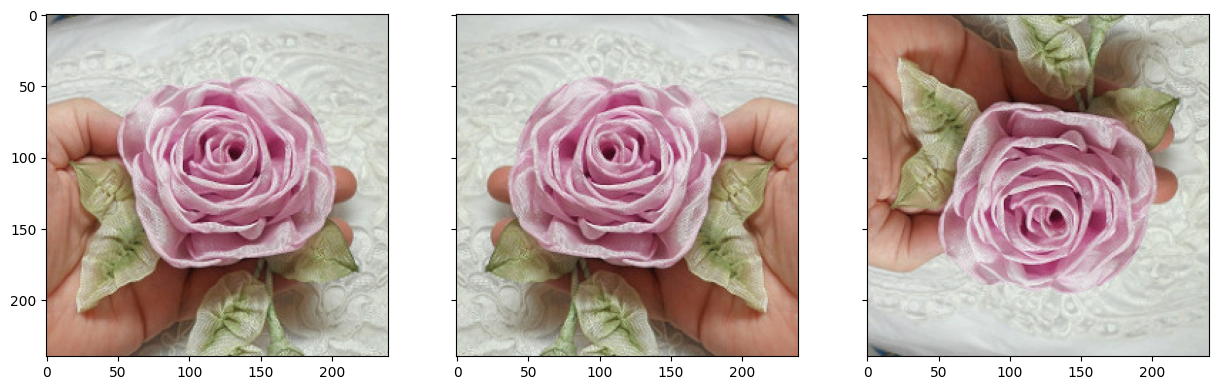

In [38]:
## flipping image left-right and upside down

image_flipr = np.fliplr(image)
image_flipud = np.flipud(image)

plot_image([image,image_flipr,image_flipud])

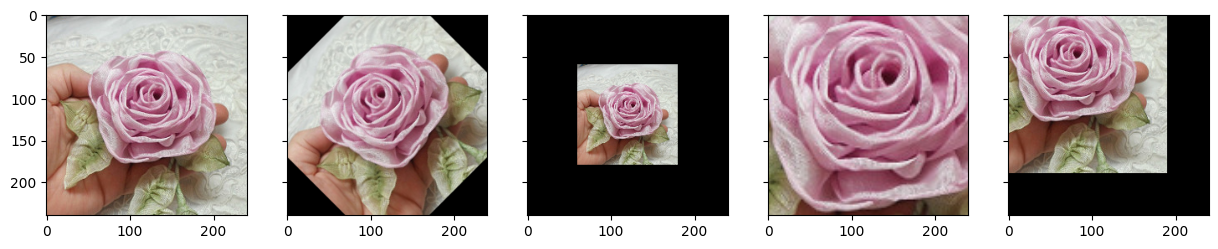

In [49]:
## Affine transformations
from skimage import transform as tf

shift_x,shift_y = image.shape[0]/2,image.shape[1]/2
matrix_to_topleft = tf.SimilarityTransform(translation=[-shift_x,-shift_y])
matrix_to_center = tf.SimilarityTransform(translation=[shift_x,shift_y])

## rotation
rot_transforms = tf.AffineTransform(rotation=np.deg2rad(45))
rot_matrix = matrix_to_topleft+rot_transforms+matrix_to_center
rot_image = tf.warp(image,rot_matrix)

# scaling
scale_transforms = tf.AffineTransform(scale=(2,2))
scale_matrix = matrix_to_topleft+scale_transforms + matrix_to_center
scale_image_zoom_out = tf.warp(image,scale_matrix)

scale_transforms  =tf.AffineTransform(scale=(0.5,0.5))
scale_matrix = matrix_to_topleft + scale_transforms+matrix_to_center
scale_image_zoom_in = tf.warp(image,scale_matrix)

## translation
translation_transforms = tf.AffineTransform(translation=(50,50))
translated_image = tf.warp(image,translation_transforms)

plot_image([image, rot_image, scale_image_zoom_out, scale_image_zoom_in, translated_image])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


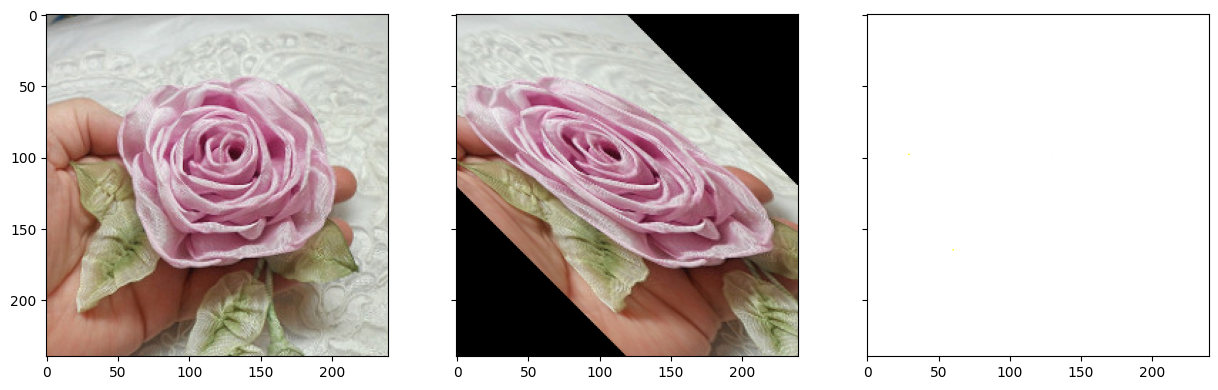

In [52]:
## shear transforms
shear_transforms = tf.AffineTransform(shear=np.deg2rad(45))
shear_matrix = matrix_to_topleft+shear_transforms+matrix_to_center
shear_image = tf.warp(image,shear_matrix)

bright_jitter= image*0.999+np.zeros_like(image)*0.001
plot_image([image,shear_image,bright_jitter])

### NETWORK BUILDING

Let's now build the network. We'll import the resnet architecture from the module `resnet.py`.